## Models
- SMOTE
- ROSE
- One-class SVM, SGD one-class SVM
- Isolation forest
- Local outlier factor
- Elliptical envelope
- Logistic?
- RF?
- XGBoost?

In [89]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pickle
import numpy as np
import pandas as pd
import six
import sys
sys.modules['sklearn.externals.six'] = six
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


SMALL_FONT = {'family': 'monospace', 'size': 11}
MEDIUM_FONT = {'family': 'monospace', 'size': 14}
LARGE_FONT = {'family': 'monospace', 'weight': 'bold', 'size': 20 }


class Models:

    X_train: pd.DataFrame
    y_train: pd.Series
    X_train_resampled: pd.DataFrame
    y_train_resampled: pd.Series

    # smote = SMOTE()
    clfs = {'xgb_clf': XGBClassifier(), 'rndf_clf': RandomForestClassifier()}
    xgb_clf = XGBClassifier()
    rndf_clf = RandomForestClassifier()

    def __init__(self):
        for df in ['X_train', 'y_train']:
            with open(f'./pickles/{df}.obj', 'rb') as f:
                setattr(self, f'{df}', pickle.load(f))

    def perform_resampling(self, downsampling: bool = False, down_ratio: float = 1.0, up_ratio: float = 0.5):
        X_cols = self.X_train.columns
        if downsampling:
            smote = SMOTE(sampling_strategy=up_ratio)
            undersampler = RandomUnderSampler(sampling_strategy=down_ratio)
            pipeline = Pipeline(steps=[('smote', smote), ('undersampler', undersampler)])
            # X, y = smote.fit_resample(self.X_train, self.y_train)
            # X, y = undersampler.fit_resample(self.X_train, self.y_train)
        else:
            smote = SMOTE()
            # X, y = smote.fit_resample(self.X_train, self.y_train)
            pipeline = Pipeline(steps=[('smote', smote)])

        X, y = pipeline.fit_resample(self.X_train, self.y_train)
        self.X_train_resampled, self.y_train_resampled = pd.DataFrame(X, columns=X_cols), pd.Series(y, name='target')
        print('Resampling completed.')

        val_counts_before = self.y_train.value_counts()
        val_counts_after = self.y_train_resampled.value_counts()

        mpl.rc('font', **LARGE_FONT)
        fig, ax = plt.subplots(1, 2, figsize=(30,10), sharey=True)
        fig.suptitle('Resampled class distribution')
        ax_titles = ['Before resampling', 'After resampling']

        for i, vals in enumerate([val_counts_before, val_counts_after]):
            sns.barplot(x=['<50k', '>=50k'], y=vals.values, ax=ax[i])
            ax[i].set_title(ax_titles[i])

        def show_values_on_bars(axs):
            def _show_on_single_plot(ax):
                for p in ax.patches:
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height()
                    value = '{:.0f}'.format(p.get_height())
                    ax.text(_x, _y*1.01, value, ha="center")

            if isinstance(axs, np.ndarray):
                for idx, ax in np.ndenumerate(axs):
                    _show_on_single_plot(ax)
            else:
                _show_on_single_plot(axs)

        show_values_on_bars(ax)
        plt.tight_layout()
        plt.show()

models = Models()

Resampling completed.


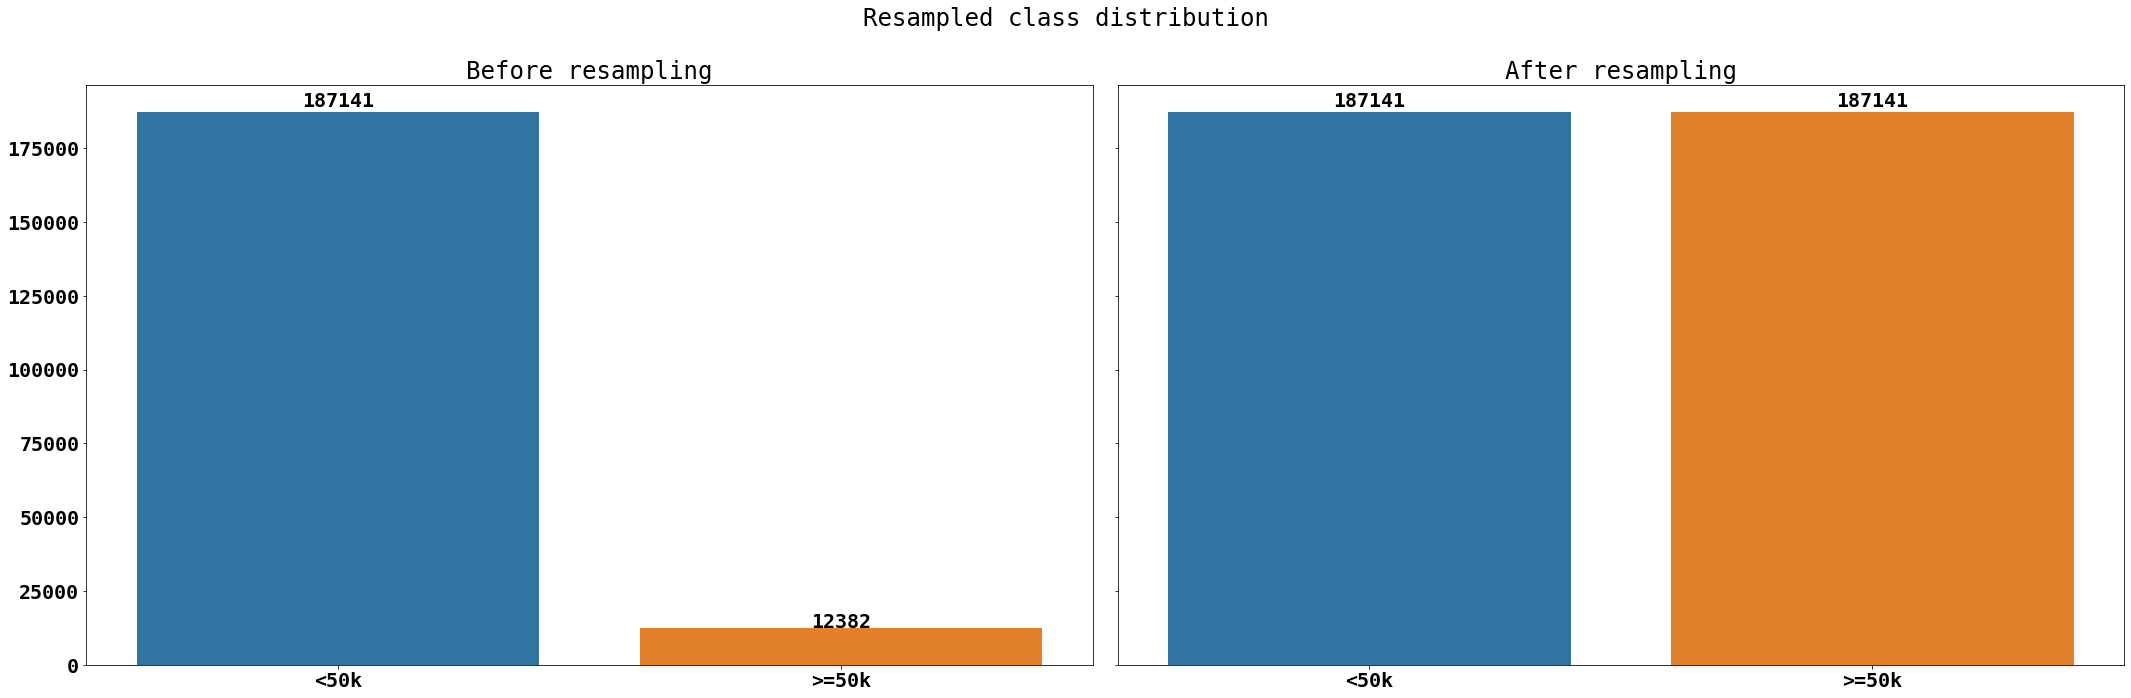

In [90]:
models.perform_resampling()

Resampling completed.


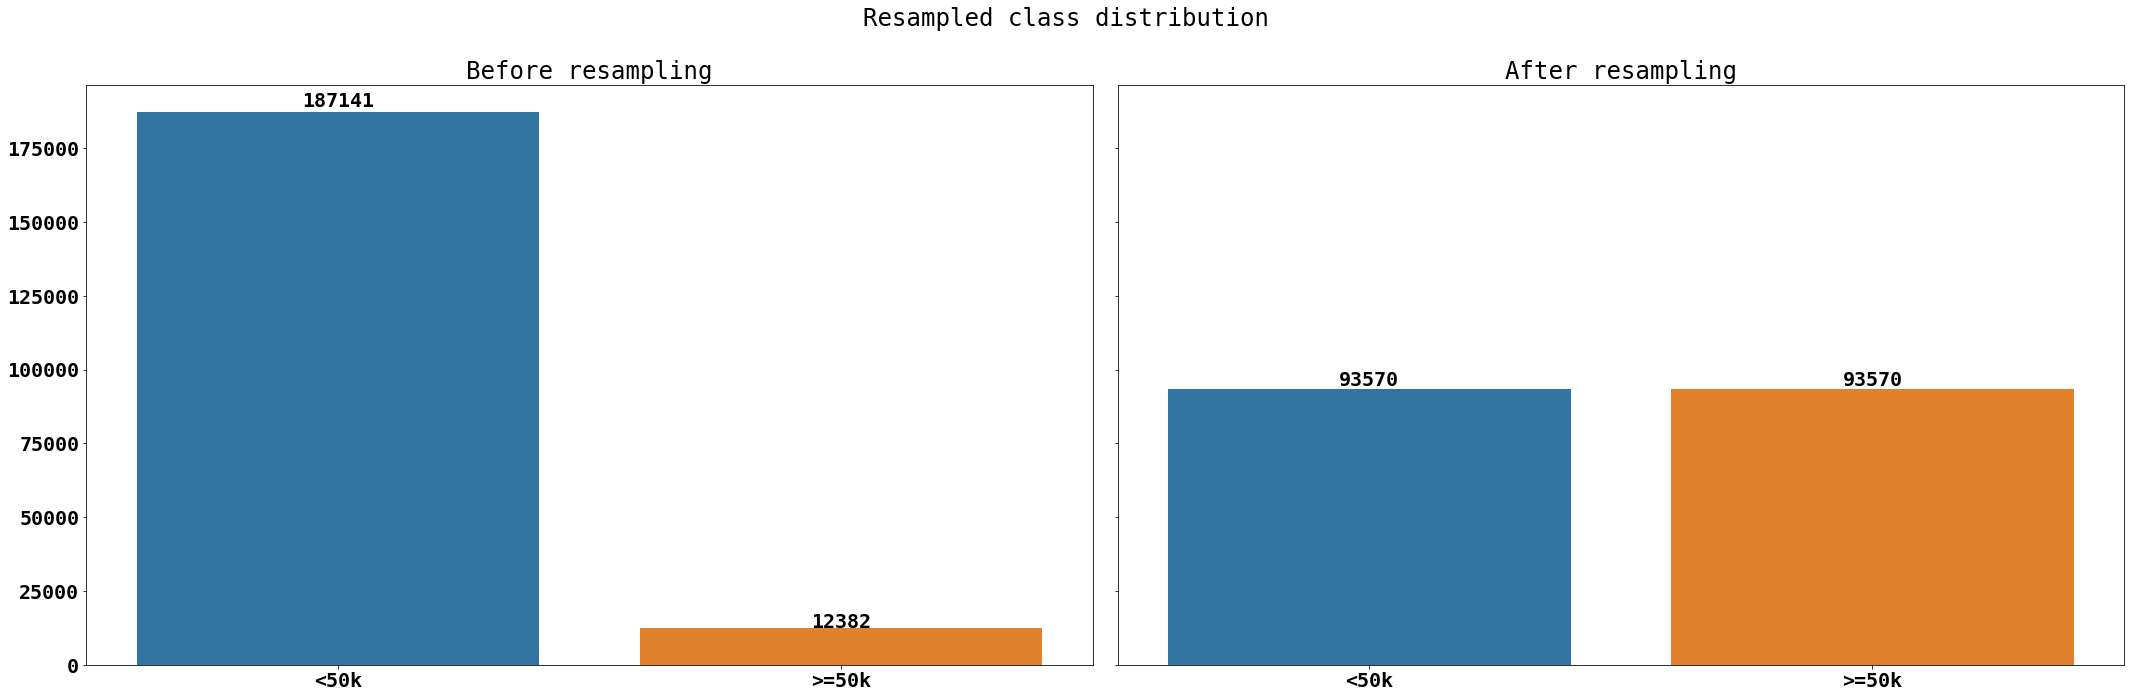

In [91]:
models.perform_resampling(downsampling=True)